# 📊 HR Analytics: A Data-Driven Exploration of Employee Attrition
*Why do employees quit their jobs?*

## 1. Introduction: Context and Dataset Overview

### 1.1 Context
Employee attrition is a critical issue for organizations due to its significant financial and operational impacts. High turnover can cost companies anywhere from 20% to 200% of an employee's annual salary, factoring in recruitment, training, and lost productivity during the transition. Frequent attrition can also disrupt team dynamics, lower morale, and result in the loss of valuable knowledge and experience.

Understanding the factors that contribute to attrition allows companies to take proactive steps toward improving retention, reducing both direct and indirect costs. Addressing these factors leads to a more stable and engaged workforce, ultimately boosting productivity and business success.

### 1.2 Dataset Overview and Key Variables

- **Source**: [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Purpose**: Developed by IBM, this dataset provides detailed information on employee attributes and attrition. It includes factors such as job satisfaction, performance ratings, education level, work-life balance, monthly income, tenure, and more. These elements help identify key factors influencing an employee’s decision to leave.


**Key Variables**:
- **Attrition**: Whether the employee left the company (Yes/No).
- **JobSatisfaction**: The employee's job satisfaction level (Low, Medium, High, Very High).
- **PerformanceRating**: The employee's performance rating (Low, Good, Excellent, Outstanding).
- **MonthlyIncome**: The employee's monthly salary.
- **WorkLifeBalance**: The employee's work-life balance (Bad, Good, Better, Best).
- **YearsAtCompany**: The number of years the employee has worked at the company.
- **DistanceFromHome**: The distance from home to the workplace.
- **JobRole**: The employee's role within the organization.

Other variables present in the dataset may also provide valuable insights and will be explored further during the analysis.

### 1.3 Project Analysis Goals
The main objective of this project is to analyze employee attrition to identify the trends and factors that contribute to employee loss. I will begin with an **exploratory data analysis (EDA)**, using visualizations to identify patterns, correlations, and relationships between key factors. My curiosity will guide the analysis, allowing me to explore new findings and refine my understanding of the data.

Finally, I will create an interactive **Power BI dashboard** to clearly present the findings, making them accessible to stakeholders for informed decision-making.

## 2. Import Libraries and Load Dataset

In [1]:
# Install seaborn library if it's not already installed
!pip3 install seaborn

# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for matplotlib
plt.style.use('ggplot')
%matplotlib inline


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
# Load the dataset
df = pd.read_csv('IBM HR Analytics Employee Attrition.csv')
print("Here are the first 5 rows of the dataframe:")
df.head()

Here are the first 5 rows of the dataframe:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Display the number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in our dataframe.")

There are 1470 rows and 35 columns in our dataframe.


## 3. Data Cleaning

### 3.1 Handling Missing Values

In [4]:
# Check for missing values and display details by column
missing_values = df.isna().sum()
if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset:")
    print(missing_values[missing_values > 0])

There are no missing values in the dataset.


### 3.2 Remove Duplicates

In [5]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if duplicate_rows.shape[0] == 0:
    print(f"There are no duplicate rows in the dataset. Each row is unique, meaning we have {df.shape[0]} unique employee records in the dataset.")
else:
    print(f"There are {duplicate_rows.shape[0]} duplicate rows in the dataset.")
    print("The following rows are duplicates and we'll remove them:")
    print(duplicate_rows)
    df.drop_duplicates(inplace=True)

There are no duplicate rows in the dataset. Each row is unique, meaning we have 1470 unique employee records in the dataset.


### 3.3 Outliers

In [6]:
pd.set_option('display.max_columns', None)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


After reviewing the statistical summary, it appears that there are no obvious outliers: I don’t see any erroneous or extreme values that stand out. Specifically, there are no issues such as a negative monthly salary or a negative percentage salary increase, for example. However, it is worth noting the presence of several unnecessary columns, which will be addressed in a separate section later.

To further investigate potential outliers, it would be helpful to focus on the continuous numerical variables that exhibit higher variability. These include **DailyRate**, **MonthlyIncome**, **MonthlyRate**, **DistanceFromHome**, **TotalWorkingYears**, and **YearsAtCompany**. By "higher variability," we mean variables that show a larger spread of values or fluctuations, such as those with a higher standard deviation relative to their mean. These variables are more likely to contain extreme values, and using boxplots will help visually identify any outliers present in the data.

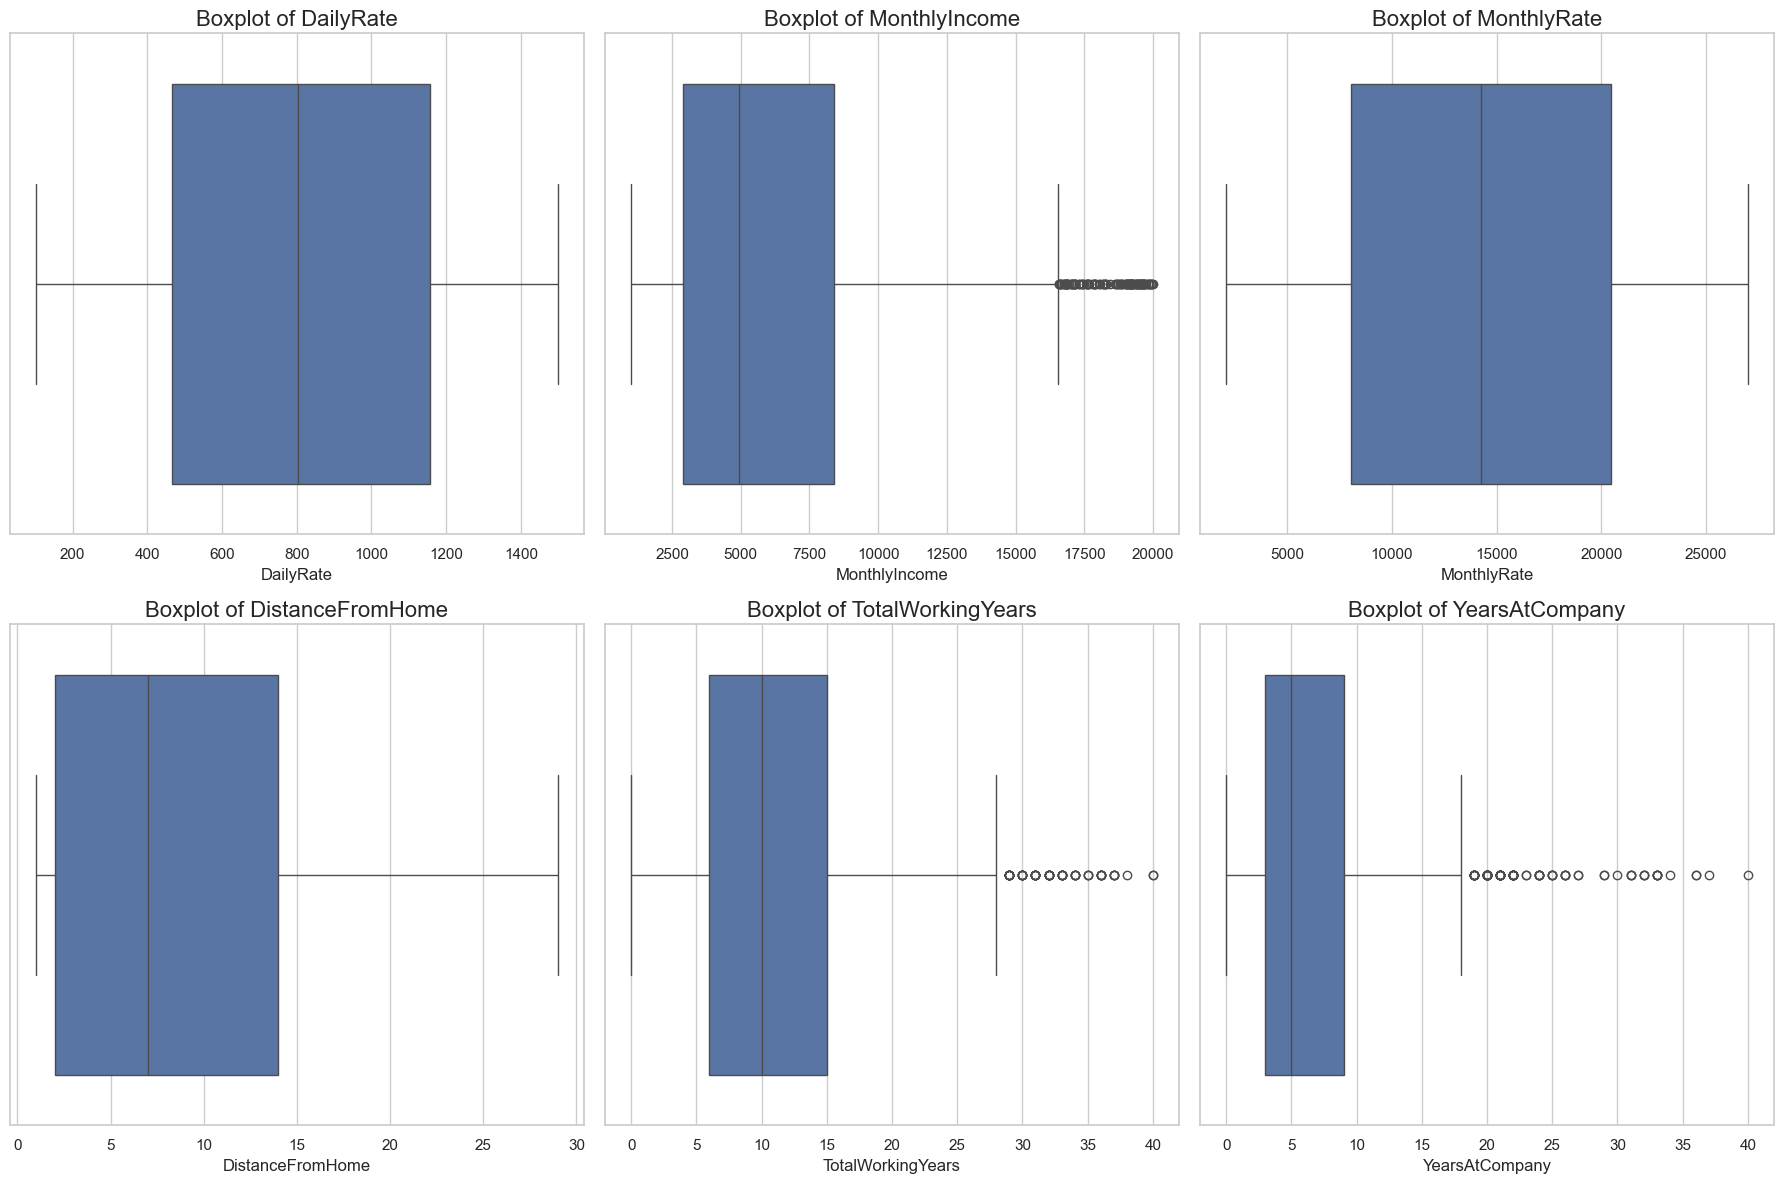

In [7]:
# List of continuous numerical variables to focus on for potential outliers
potential_outliers = ['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Create boxplots for each variable in a 2x3 grid
for i, var in enumerate(potential_outliers):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=var)
    plt.title(f'Boxplot of {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)

plt.tight_layout()
plt.show()

For DistanceFromHome, MonthlyRate, and DailyRate, no obvious outliers are observed, as all values lie within the expected range. However, for MonthlyIncome, TotalWorkingYears, and YearsAtCompany, several extreme values exceed the upper whisker of the boxplot.

While these values may indicate potential outliers, it’s important to further investigate these records to determine whether they are legitimate or reflect data issues. We will now review the employees associated with these extreme values to verify their legitimacy.

In [8]:
# Define the variables and their respective thresholds for outliers (upper whisker of the boxplot)
outlier_thresholds = {
    'MonthlyIncome': df['MonthlyIncome'].quantile(0.75) + 1.5 * (df['MonthlyIncome'].quantile(0.75) - df['MonthlyIncome'].quantile(0.25)),
    'TotalWorkingYears': df['TotalWorkingYears'].quantile(0.75) + 1.5 * (df['TotalWorkingYears'].quantile(0.75) - df['TotalWorkingYears'].quantile(0.25)),
    'YearsAtCompany': df['YearsAtCompany'].quantile(0.75) + 1.5 * (df['YearsAtCompany'].quantile(0.75) - df['YearsAtCompany'].quantile(0.25)),
}

# Filter the data to get the rows where these variables exceed the threshold
outliers = df[(df['MonthlyIncome'] > outlier_thresholds['MonthlyIncome']) | (df['TotalWorkingYears'] > outlier_thresholds['TotalWorkingYears']) | (df['YearsAtCompany'] > outlier_thresholds['YearsAtCompany'])]
outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,1,Female,42,2,3,Healthcare Representative,4,Married,10248,2094,3,Y,No,14,3,4,80,1,24,4,3,22,6,5,17
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,42,No,Non-Travel,335,Research & Development,23,2,Life Sciences,1,1976,4,Male,37,2,2,Research Scientist,3,Single,4332,14811,1,Y,No,12,3,4,80,0,20,2,3,20,9,3,7
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,4,Male,87,3,5,Manager,4,Single,19431,15302,2,Y,No,13,3,3,80,0,21,3,2,6,0,1,3
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,1,Male,56,3,5,Manager,3,Married,18880,17312,5,Y,No,11,3,1,80,0,24,2,2,22,6,4,14
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10


We are working with an 'outliers' dataset, consisting of 185 unique employees, each of whom exhibits at least one extreme value in one of the following variables: **MonthlyIncome**, **TotalWorkingYears**, and **YearsAtCompany**. My goal is to address these extreme values to determine whether they are legitimate or if they indicate a potential issue.

To achieve this, I will first create a correlation matrix to identify the variables most correlated with those exhibiting extreme values. Then, I will generate plots specifically for the employees present in the 'outliers' dataset, in order to see whether the extreme values align with the observed correlations. The objective here is to identify any isolated extreme value that does not conform to the expected correlation, in which case we will further investigate that particular case.

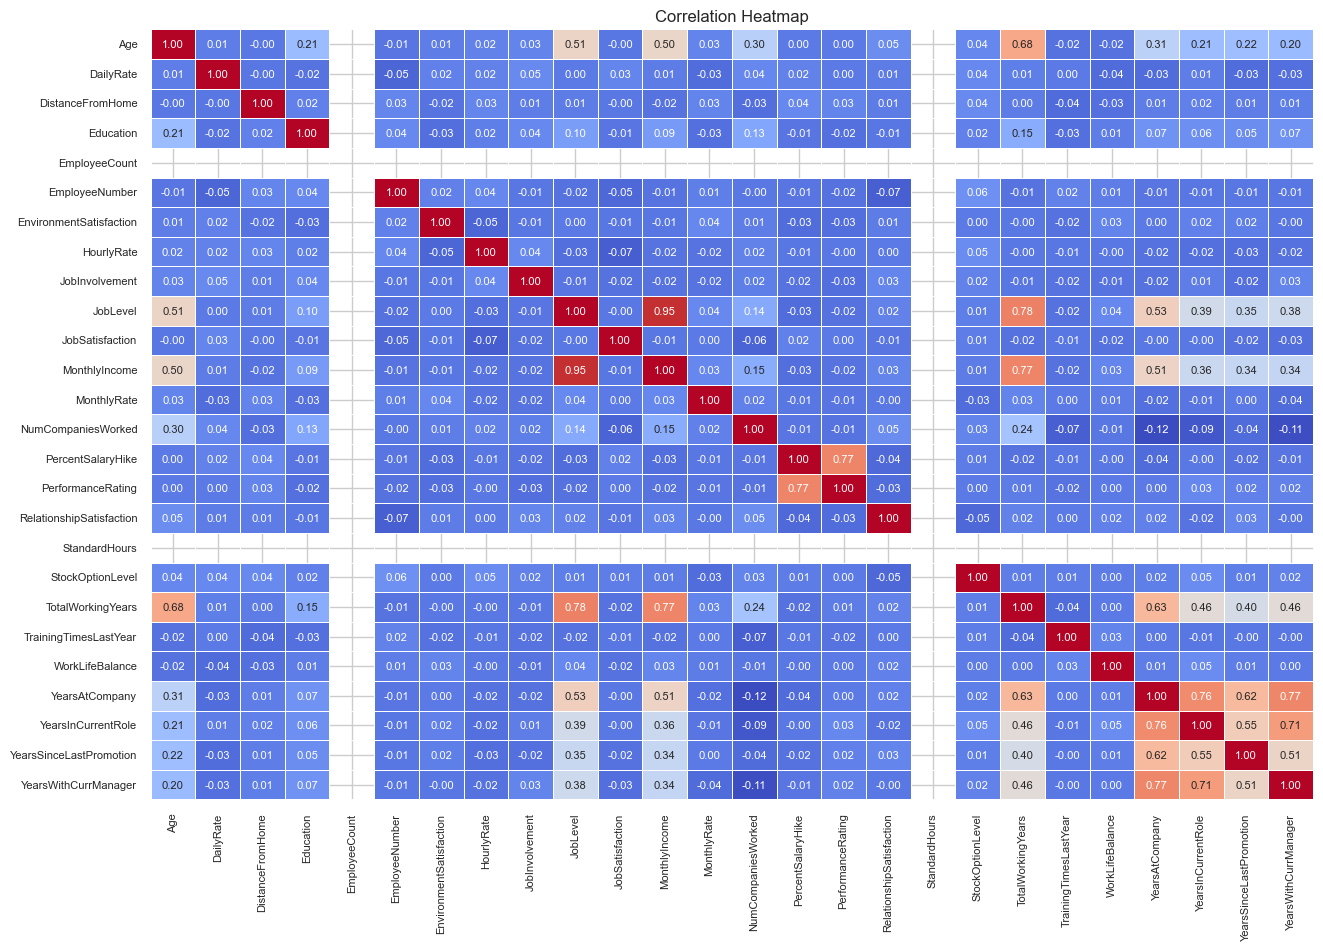

In [9]:
df_num = df.select_dtypes(include='number')

plt.figure(figsize= (15,10))
sns.heatmap(df_num.corr() , 
            annot= True,
            cbar= False,
            cmap= 'coolwarm',
            fmt= '.2f',
            linecolor= 'white', 
            linewidths= 0.5,
            annot_kws= {"size": 8})

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

Based on this correlation matrix:

- **JobLevel** and **MonthlyIncome** show a very strong positive correlation, almost perfect, with a value of 0.95.
- **TotalWorkingYears** and **MonthlyIncome** also exhibit a strong positive correlation, with a value of 0.77.
- **TotalWorkingYears** and **JobLevel** are also highly correlated, with a correlation of 0.78.
- **YearsAtCompany** and **YearsWithCurrManager** show a strong positive correlation of 0.77.
- **YearsAtCompany** and **YearsCurrentRole** exhibit a strong positive correlation of 0.76.

These correlations provide valuable insights for the visualizations that will be used to identify potential anomalies among the extreme values we identified through our box plots. Now, let's move on to the visualizations!

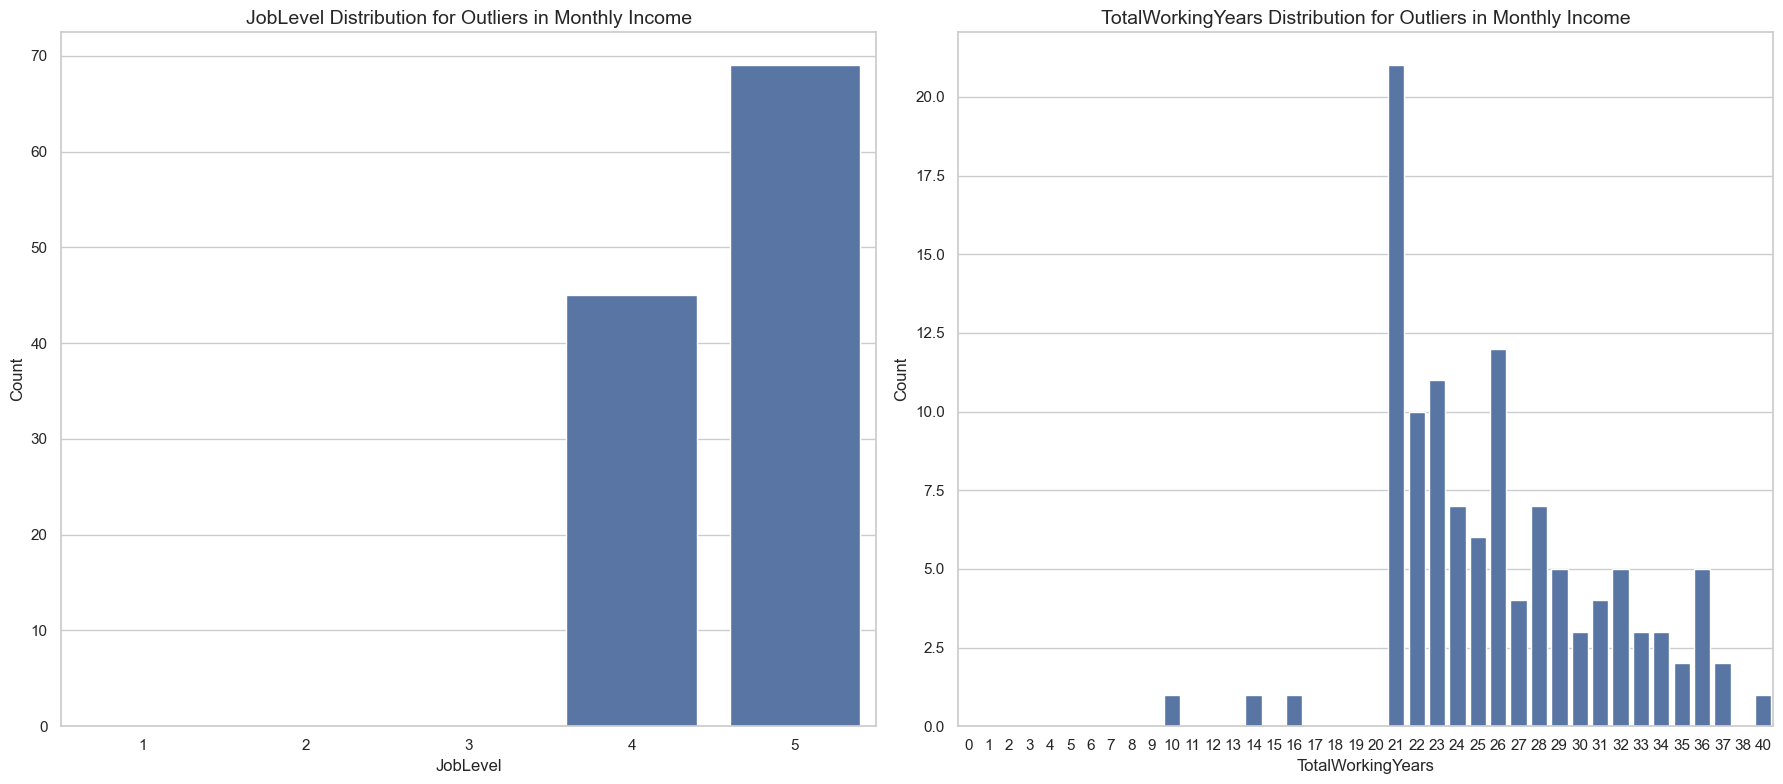

In [10]:
# Filter the outliers for MonthlyIncome
outliers_monthly_income = df[df['MonthlyIncome'] > outlier_thresholds['MonthlyIncome']]

# Variables to plot
interest_var = ['JobLevel', 'TotalWorkingYears']

plt.figure(figsize=(18, 8))

# Loop through the variables and create a countplot for each
for i, var in enumerate(interest_var):
    plt.subplot(1, 2, i + 1)  
    sns.countplot(x=var, data=outliers_monthly_income, order=sorted(df[var].unique()))

    plt.title(f'{var} Distribution for Outliers in Monthly Income', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout() 
plt.show()

Based on these two countplots, there is nothing unusual. Employees with extreme monthly income values hold high and very high job levels. In fact, among all employees in the company, only 69 have a job at level 5. These 69 employees are present in the dataset of those with extreme income values, as seen in the countplot representing the distribution of job levels for employees with extreme salaries. The second countplot reveals that the majority of employees with extreme salaries have more than 20 years of experience. With all this information, we can conclude that there are no anomalies in the extreme salary values for certain employees; they simply hold important positions and have significant experience (over 20 years).



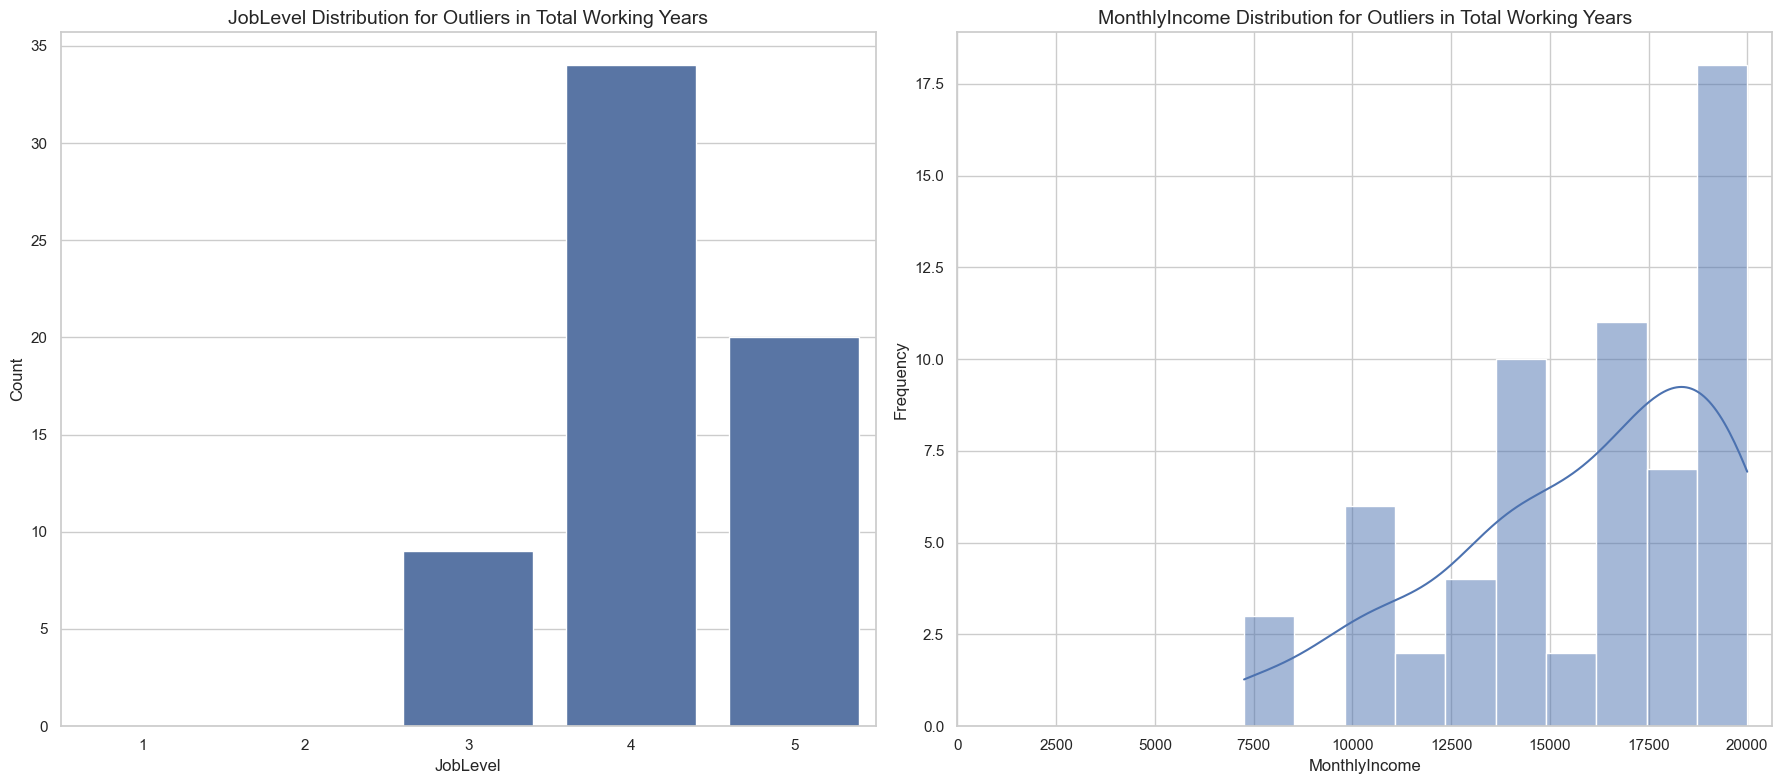

In [11]:

outliers_total_working_years = df[df['TotalWorkingYears'] > outlier_thresholds['TotalWorkingYears']]

# Variables to plot
interest_var = ['JobLevel', 'MonthlyIncome']

plt.figure(figsize=(18, 8))

# Loop through the variables and create the appropriate plot for each
for i, var in enumerate(interest_var):
    plt.subplot(1, 2, i + 1)  
    if var == 'JobLevel':
        # Use countplot for categorical 'JobLevel'
        sns.countplot(x=var, data=outliers_total_working_years, order=sorted(df[var].unique()))
        plt.ylabel('Count', fontsize=12)
    else:
        # Use histplot for continuous 'MonthlyIncome'
        sns.histplot(outliers_total_working_years[var], bins=10, kde=True)
        plt.xlim(0)
        plt.ylabel('Frequency', fontsize=12)

    plt.title(f'{var} Distribution for Outliers in Total Working Years', fontsize=14)
    plt.xlabel(var, fontsize=12)

# Show the plot
plt.tight_layout()  
plt.show()


Employees with high total working years (extreme values) are predominantly in senior roles (Job Levels 4 and 5), reflecting the expected career progression. They also tend to have high monthly incomes, mainly in the range of 15,000 to 20,000, which aligns with their extensive experience. This pattern suggests that these outliers are legitimate and correspond well to the expected correlations as seen in the correlation matrix.

As such, these extreme values for TotalWorkingYears do not indicate anomalies and will not be removed from the dataset, as they reflect the expected relationships between experience, job level, and compensation.

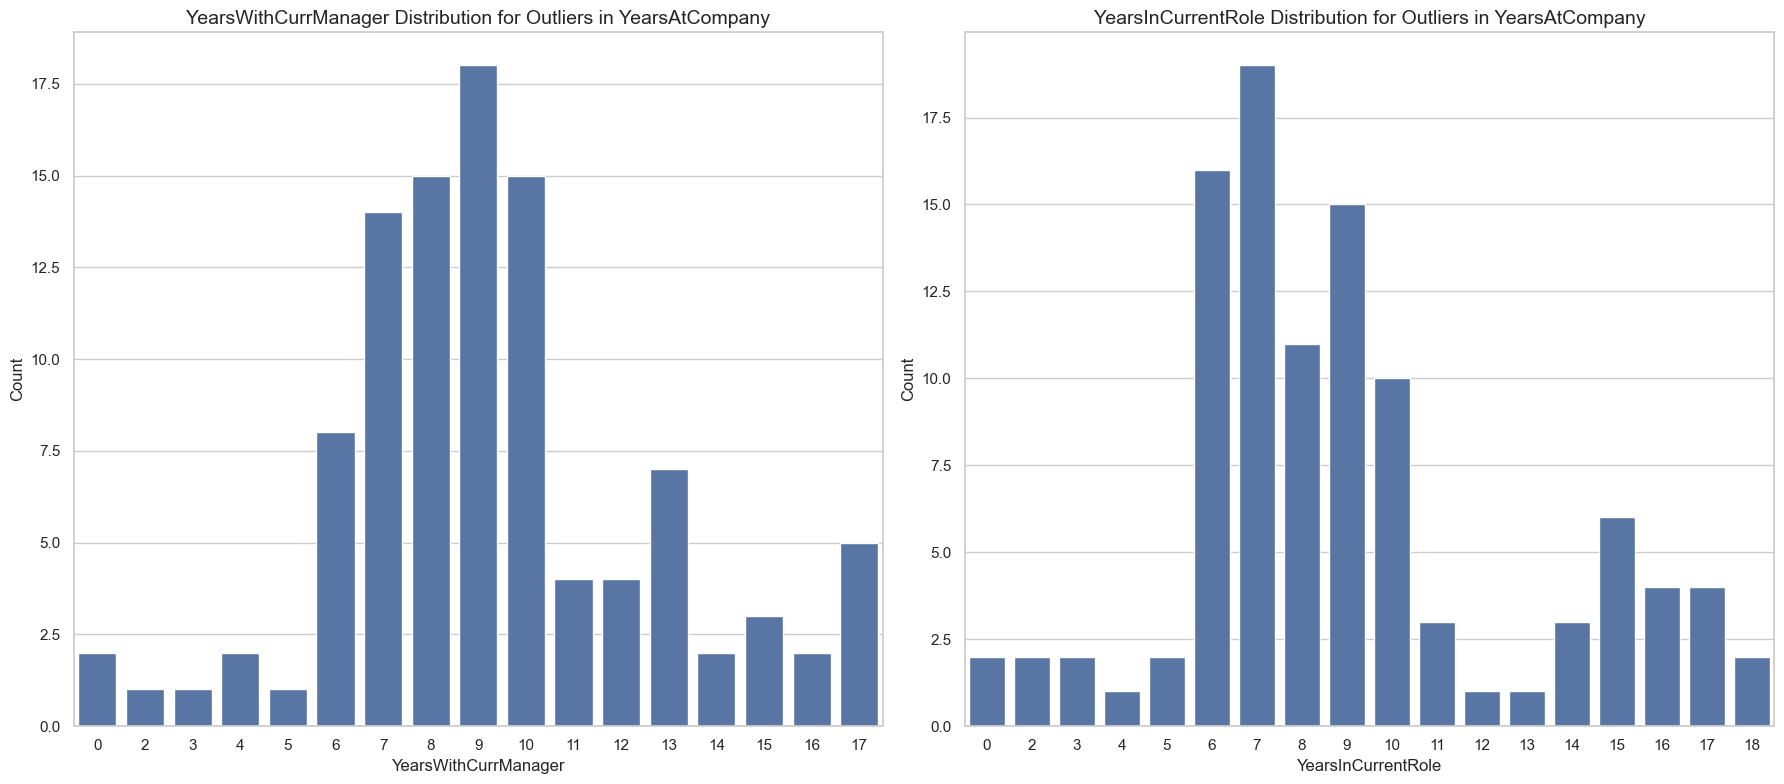

In [12]:
outliers_years_at_company = df[(df['YearsAtCompany'] > outlier_thresholds['YearsAtCompany'])]

interest_var = ['YearsWithCurrManager', 'YearsInCurrentRole']
plt.figure(figsize=(18, 8))

# Loop through the variables and create a countplot for each
for i, var in enumerate(interest_var):
    plt.subplot(1, 2, i + 1)  
    sns.countplot(x=var, data=outliers_years_at_company, order=sorted(outliers_years_at_company[var].unique()))

    plt.title(f'{var} Distribution for Outliers in YearsAtCompany', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout() 
plt.show()

......

----------------

## 4. Data Wrangling

### 4.1 Data Types 

In [13]:
# Check the current data types
print('The current data types are:')
print(df.dtypes)

The current data types are:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel           

The data types of each variable are appropriate, so no changes have been made. Some variables, such as Education, JobSatisfaction, or even PerformanceRating, are ordinal qualitative variables and currently have the int64 data type. I’ve kept them as integers because they are ordinal variables, and using integers preserves their inherent order (e.g., 'Low' < 'Medium' < 'High'). This simplifies numerical calculations and statistical analysis.

However, for clarity in data visualizations, I will replace the numerical values with textual labels (e.g., replacing 1, 2, 3, 4 with "Low", "Medium", "High", "Very High") to make the charts more intuitive and accessible.

### 4.2 Irelevant Columns 

In [14]:
pd.set_option('display.max_columns', None)
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


After reviewing the table with various statistics, we have noticed that three columns do not contribute valuable information to our analysis:

- **Over18**: All employees are over 18, and the column contains the same value 'Y' for every row.
- **StandardHours**: Simmilar to the **Over18** column, this column has a constant value (80) for all employees.
- **EmployeeCount**: This column has a constant value (1) for all employees, offering no variation and therefore no analytical value.
- **EmployeeNumber**: This is a unique identifier for each employee. While it is useful for data management, it does not contribute to the analysis itself, as we are assured that each row represents a unique employee.

Given that these columns do not add value to our analysis, we have decided to remove them from the dataset:

In [15]:
# Remove columns that do not contribute valuable information for analysis
cols_to_drop = ['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']
df.drop(columns=cols_to_drop, inplace=True)

By removing these columns, we streamline the dataset, ensuring it contains only relevant information for further analysis.

Ideas/Brainstorm : 


- Feature Engineering mybe ( )
- matrice de correlation (peut donner un avant gout car on a beaucoup de colonne et cela permettrai de focus nos visualisations)
- Modélisation prédictive ???? (variable cible binaire Attrition, pourquoi pas se pencher sur le sujet)
